___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
# Importing the libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact
%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [98]:
# Importing libraries for DL and ML
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKerasTF
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix
import optuna
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam 
from sklearn.utils import class_weight

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [7]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [8]:
x_train[5].shape

(28, 28)

In [9]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

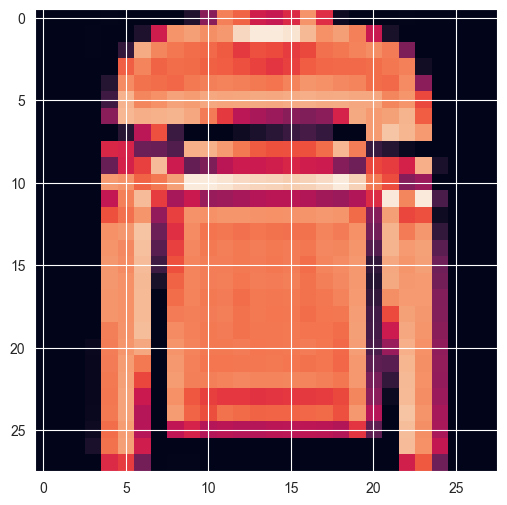

In [15]:
plt.imshow(x_train[5])

In [16]:
y_train[5]

2

In [18]:
y_train.shape

(60000,)

In [19]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [20]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [25]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [29]:
classes[y_train[5]]

'Pullover'

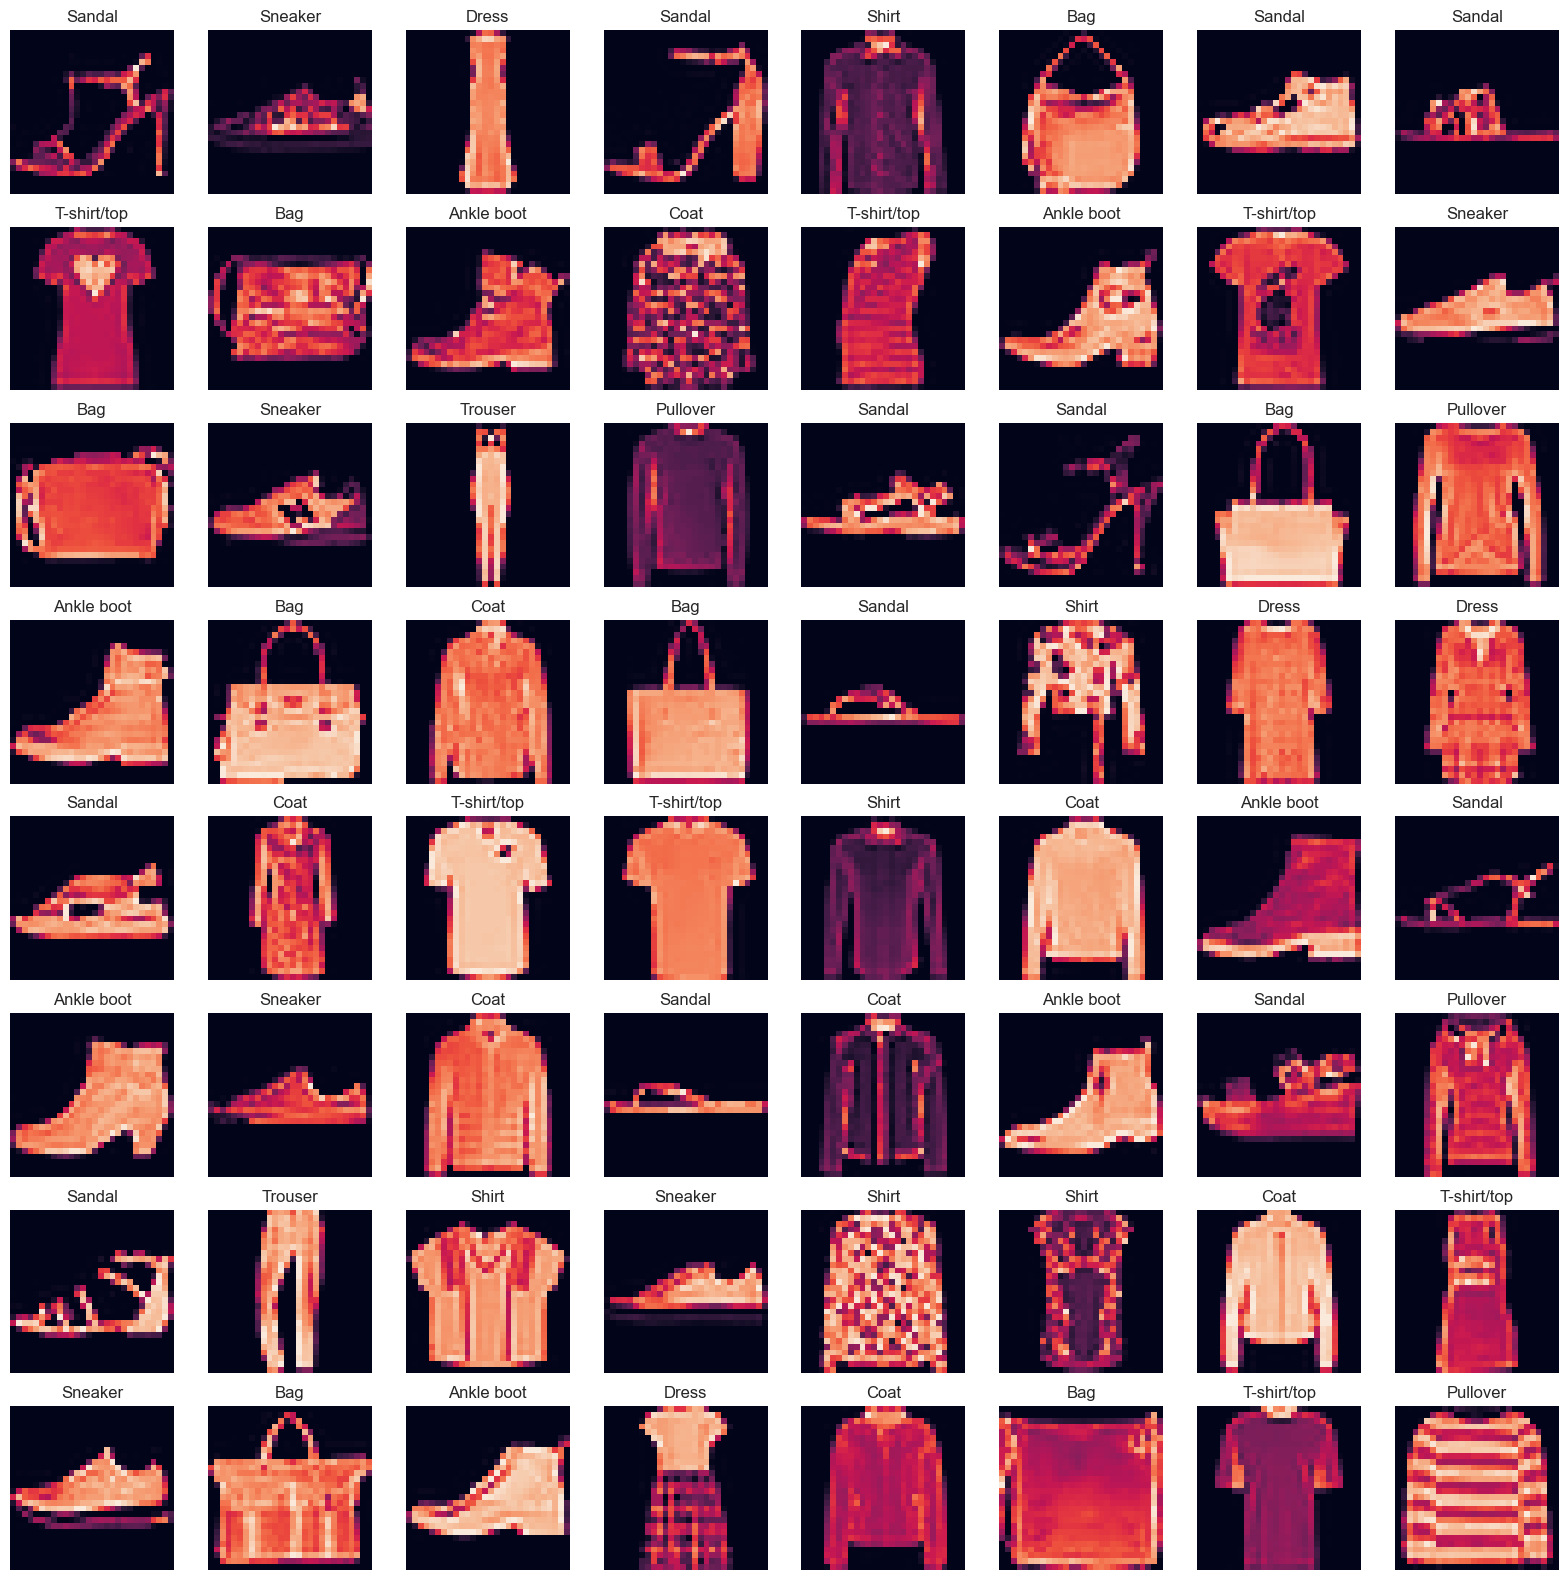

In [30]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [31]:
x_train[5].min()

0

In [32]:
x_train[5].max()

255

In [34]:
# Normalize image pixels

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [36]:
x_train[5].min()

0.0

In [37]:
x_train[5].max()

1.0

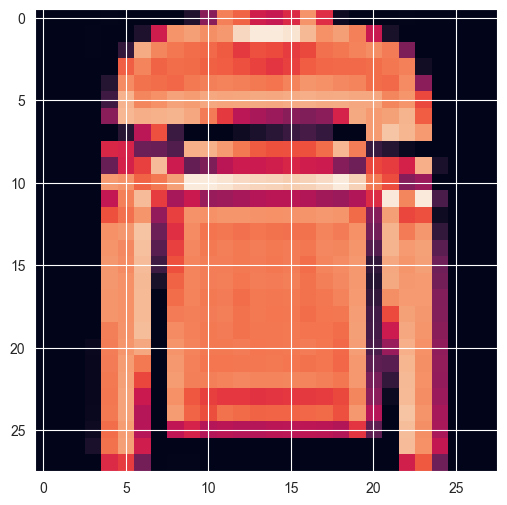

In [39]:
plt.imshow(x_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [47]:
X_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [42]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [43]:
y_train[0]

9

In [44]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [50]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [59]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

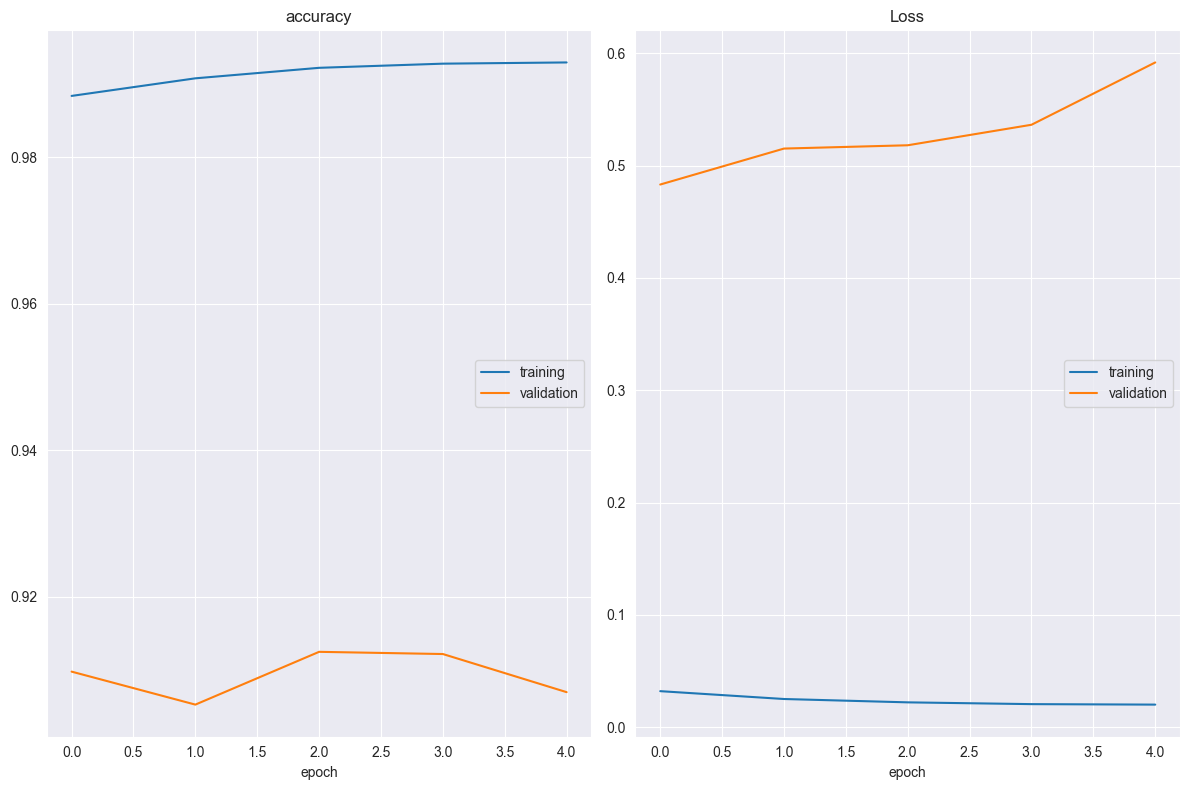

accuracy
	training         	 (min:    0.988, max:    0.993, cur:    0.993)
	validation       	 (min:    0.905, max:    0.913, cur:    0.907)
Loss
	training         	 (min:    0.020, max:    0.032, cur:    0.020)
	validation       	 (min:    0.483, max:    0.592, cur:    0.592)
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.5918 - val_accuracy: 0.9070


In [60]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test),callbacks=[[early_stop, PlotLossesKerasTF()]]) 

**TASK 7: Plot values of metrics you used in your model.**

In [61]:
model.metrics_names

['loss', 'accuracy']

In [62]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.0,1.0,0.5,0.9
1,0.0,1.0,0.5,0.9
2,0.0,1.0,0.5,0.9
3,0.0,1.0,0.5,0.9
4,0.0,1.0,0.6,0.9


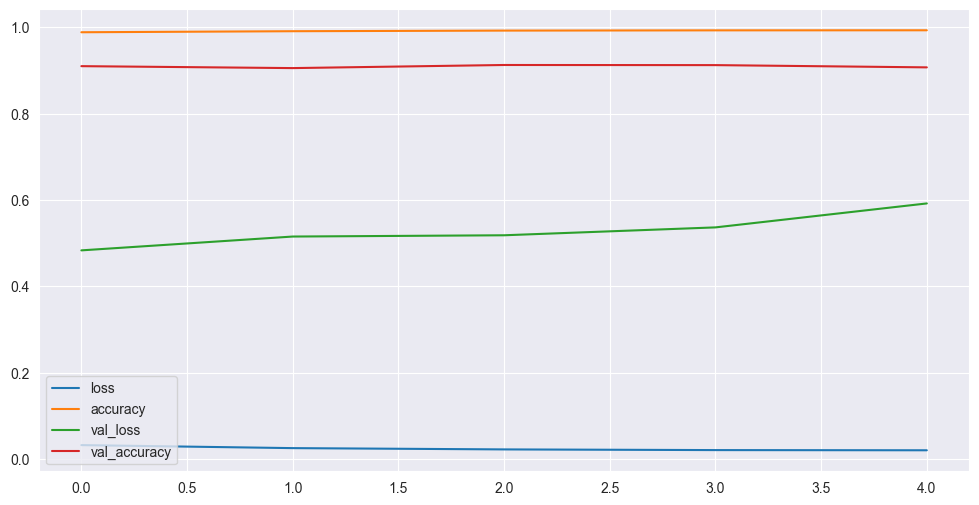

In [63]:
summary.plot();

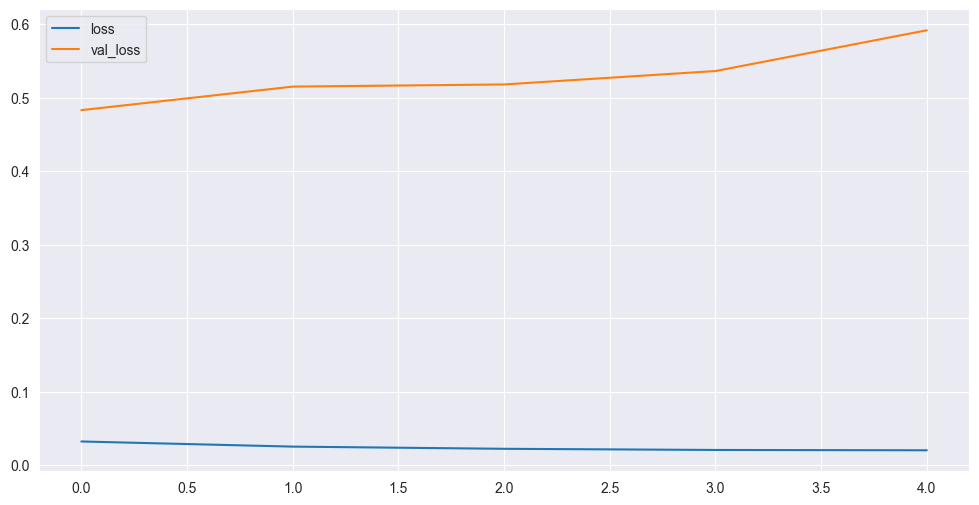

In [64]:
summary[["loss", "val_loss"]].plot();

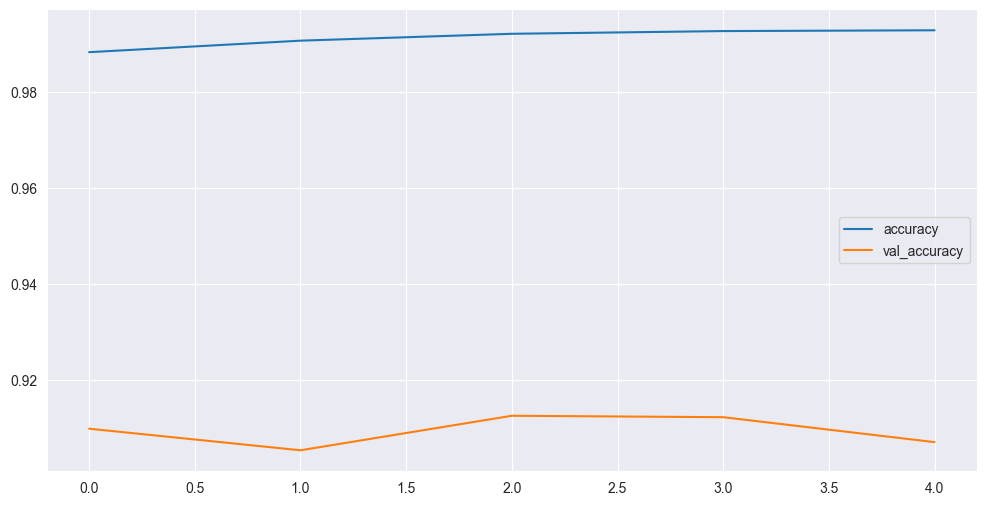

In [65]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [69]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5181 - accuracy: 0.9125


[0.5180833339691162, 0.9125000238418579]

In [70]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5180833339691162
Test accuracy: 0.9125000238418579


In [71]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 4ms/step


array([[1.56733333e-14, 7.18796235e-16, 4.15837281e-10, ...,
        2.74028272e-10, 2.00973191e-16, 1.00000000e+00],
       [8.11009040e-22, 1.20762819e-17, 9.99999642e-01, ...,
        2.38932116e-23, 2.09384068e-26, 9.08187673e-27],
       [2.11442810e-20, 1.00000000e+00, 1.33386856e-20, ...,
        6.74928119e-36, 1.19415135e-17, 3.89411156e-32],
       ...,
       [3.74489975e-18, 1.65848009e-22, 9.97767833e-22, ...,
        2.04122025e-13, 1.00000000e+00, 5.02853313e-21],
       [5.51077030e-20, 1.00000000e+00, 9.73821177e-24, ...,
        2.97339797e-32, 9.82664429e-18, 3.01365515e-29],
       [2.37584974e-09, 2.01628545e-08, 3.91168287e-05, ...,
        9.39163845e-04, 1.17205582e-06, 4.03040410e-08]], dtype=float32)

In [72]:
pred_prob.shape

(10000, 10)

In [73]:
pred_prob[0]

array([1.5673333e-14, 7.1879624e-16, 4.1583728e-10, 9.2435004e-19,
       2.8846537e-14, 9.1041369e-11, 2.4361886e-14, 2.7402827e-10,
       2.0097319e-16, 1.0000000e+00], dtype=float32)

In [74]:
np.argmax(pred_prob[0])

9

In [76]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [77]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.90      0.84      0.87      1000
           3       0.91      0.92      0.91      1000
           4       0.82      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.79      0.77      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [78]:
print(confusion_matrix(y_test, y_pred))

[[821   2  15  19   9   1 129   0   4   0]
 [  2 981   1   9   4   0   2   0   1   0]
 [ 14   0 837  10  78   0  60   0   1   0]
 [ 16   7   9 918  27   0  22   0   1   0]
 [  0   1  33  30 894   1  40   0   1   0]
 [  1   0   0   0   0 981   0  11   0   7]
 [ 75   1  38  22  72   0 786   0   6   0]
 [  0   0   0   0   0  10   0 974   0  16]
 [  2   2   1   4   1   3   7   4 976   0]
 [  0   0   0   0   0   6   1  36   0 957]]


<AxesSubplot: >

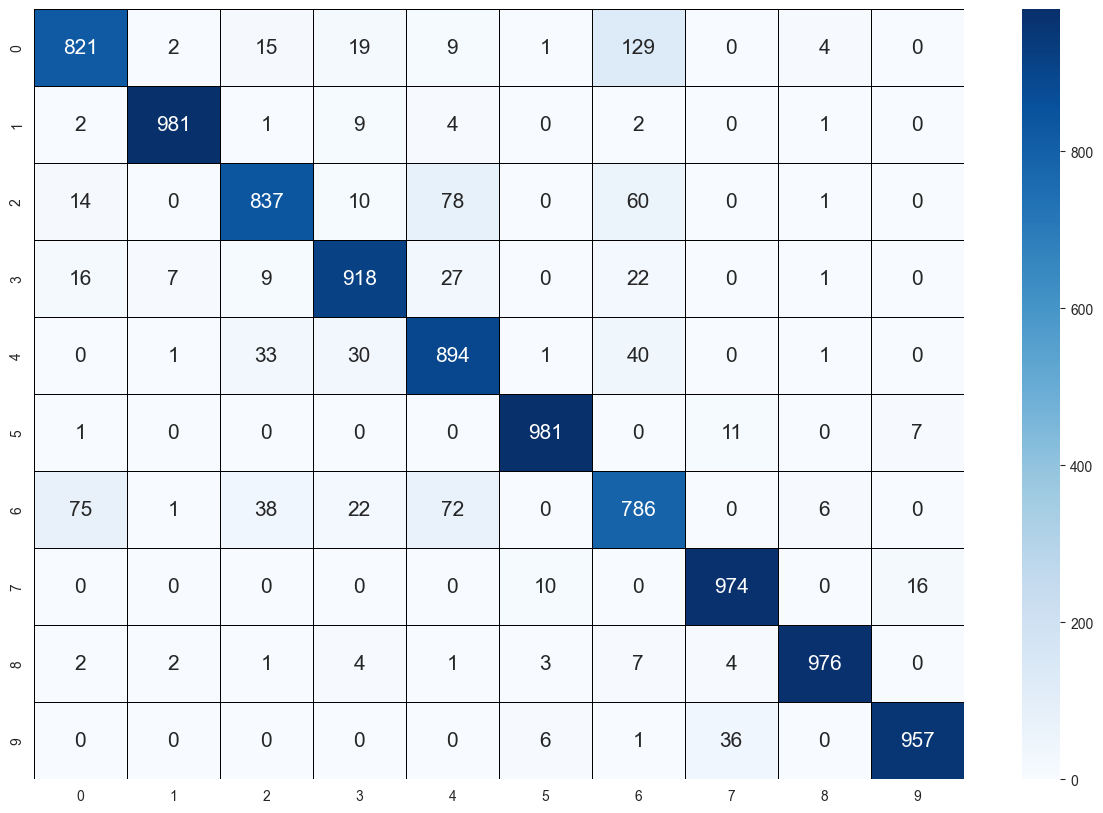

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [80]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [81]:
(y_test != y_pred).sum()

875

## Prediction

In [82]:
my_number = X_test[3]

In [83]:
my_number.shape

(28, 28, 1)

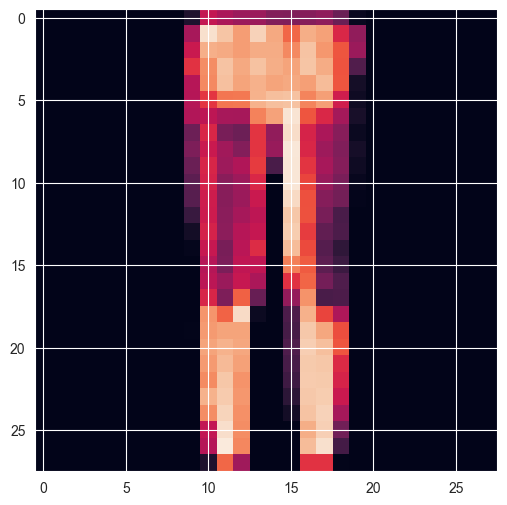

In [84]:
plt.imshow(my_number.reshape(28,28));

In [85]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 22ms/step


array([[1.7233096e-15, 1.0000000e+00, 1.8827470e-16, 4.2761171e-14,
        5.6189734e-18, 3.8077151e-21, 3.6704942e-17, 3.1433588e-27,
        4.0196464e-14, 1.0409436e-21]], dtype=float32)

In [86]:
y_pred = np.argmax(pred_prob)
y_pred

1

In [87]:
model.save("cnn2.h5")

# Using

In [88]:
model=tf.keras.models.load_model('cnn2.h5')

In [92]:
pred=model.predict(np.expand_dims(X_test[25],axis=0))

1/1 [==============================] - 0s 15ms/step


In [93]:
np.argmax(pred)

2

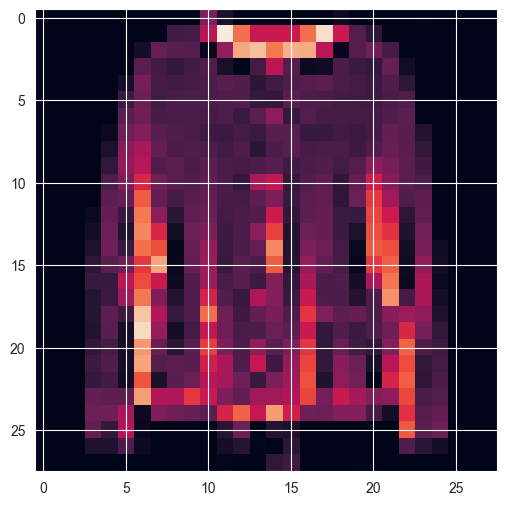

In [94]:
plt.imshow(X_test[25].reshape(28,28))

# End of Assignment

## Extra (Optuna (Hyperparameter Optimization Tool))

In [100]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [101]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

In [102]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 1.0, 1: 1.0}

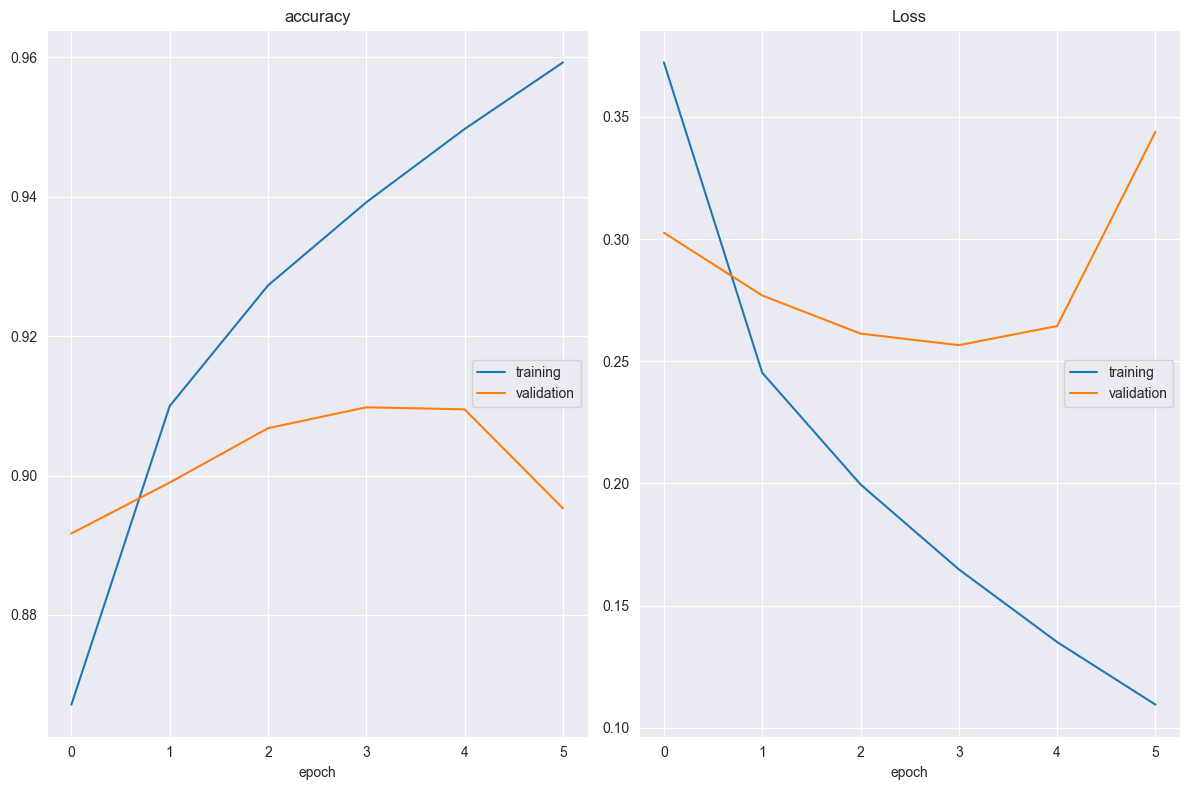

accuracy
	training         	 (min:    0.867, max:    0.959, cur:    0.959)
	validation       	 (min:    0.892, max:    0.910, cur:    0.895)
Loss
	training         	 (min:    0.109, max:    0.372, cur:    0.109)
	validation       	 (min:    0.257, max:    0.344, cur:    0.344)
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1095 - accuracy: 0.9593 - val_loss: 0.3439 - val_accuracy: 0.8953


In [103]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test),callbacks=[[early_stop, PlotLossesKerasTF()]]) 

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___